In [0]:
"""b i b l i o t e c a numerica """
import numpy as np

""" g r a f i c a s """
import matplotlib.pyplot as plt
%matplotlib inline

""" c a r g a r d a t a s e t s """
from sklearn import datasets

""" para n o rm ali z a r """
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [0]:
np.random.seed(100)

In [0]:
X = datasets.load_iris().data[:100]
Y = datasets.load_iris().target[:100]

In [0]:
def sigmoide(x):
  return 1/(1+np.exp(-x))

In [0]:
def evalua(x,W0,W1,W2):
  Y0 = sigmoide(x.dot(W0))
  Y1 = sigmoide(Y0.dot(W1))
  Y2 = sigmoide(Y1.dot(W2))
  return Y0,Y1,Y2

In [0]:
def derSigmoide(y):
  return y*(1-y)

In [0]:
def entrenamiento(Xj,Yj,W0,W1,W2):
  """Xj es un arreglo con 1 o mas casos """
  YY0, YY1, YYout = evalua(Xj, W0,W1,W2)
  errorOut = Yj - YYout
  """ d" en la capa de salida """
  dW2 = errorOut * derSigmoide(YYout)
  error1 = dW2.dot(W2.T)
  """ dW en la 2a capa oculta"""
  dW1 = error1 * derSigmoide(YY1)
  error0 = dW1.dot(W1.T)
  dW0 = error0 * derSigmoide(YY0)

  """ Calculando los ajustes """
  incW0 = Xj.T.dot(dW0)
  incW1 = YY0.T.dot(dW1)
  incW2 = YY1.T.dot(dW2)
  
  return incW0,incW1,incW2

Inciso  a)


In [23]:
alea=np.random.permutation(100)
print(alea)

[37 62 26 41 35 25 36 33 77 21 85 50 92 69 96 78 72  5 40 11 29 83 82 43
 28 22 23 90 86 20 32  6  3 12 51 84 73 64 54 68 75 74 57 42 76 99 17 93
 63  0 18 44 38 45 39 70 94 30 71 46 56 80 91 88 19 81 55 89 61 65 47 49
  7 97 59 95 13  1 31  4 27  2  9 16 58 60 15 98 34 14 66 53 52 10 48 79
 87 67 24  8]


Inciso b)

In [24]:
indx=np.zeros(100,dtype=int)
for i in range(0,100):
  indx[alea[i]]=i

Yindx=np.zeros(100,dtype=int)
Xindx=np.zeros(4*100).reshape((100,4))
for i in range(0,100):
  Yindx[i]=datasets.load_iris().target[indx[i]]
  Xindx[i]=datasets.load_iris().data[indx[i]]

print(Xindx[:100:10],Yindx[:100:10])

[[5.  3.3 1.4 0.2]
 [5.  2.3 3.3 1. ]
 [4.7 3.2 1.6 0.2]
 [4.9 2.4 3.3 1. ]
 [5.7 3.8 1.7 0.3]
 [4.8 3.4 1.6 0.2]
 [6.  3.4 4.5 1.6]
 [5.7 2.8 4.5 1.3]
 [5.9 3.  4.2 1.5]
 [5.2 3.5 1.5 0.2]] [0 1 0 1 0 0 1 1 1 0]


In [25]:
W0=np.random.random((4,3))-0.5
W1=np.random.random((3,2))-0.5
W2 = np.random.random((2,1))-0.5

for i in range(0,100):
  incW0, incW1, incW2 = entrenamiento(Xindx[i].reshape( (1, 4)),Yindx[i],W0,W1,W2)
  print("\nElemento ", i+1," :\n","\nIncremento 1: ",incW0,"\n\nIncremento 2: ",incW1,"\n\nIncremento 3: ",incW2)
  W0=incW0+W0
  W1=incW1+W1
  W2=incW2+W2
  print("\nNuevo peso despues de iteracion ", i+1," :\n","\n\nW0: ",W0,"\n\nW1: ",W1,"\n\nW2: ",W2)


Elemento  1  :
 
Incremento 1:  [[2.71739770e-04 2.92091831e-03 1.51429624e-03]
 [1.79348248e-04 1.92780608e-03 9.99435520e-04]
 [7.60871356e-05 8.17857127e-04 4.24002948e-04]
 [1.08695908e-05 1.16836732e-04 6.05718497e-05]] 

Incremento 2:  [[0.00790801 0.0074951 ]
 [0.00677565 0.00642187]
 [0.00351652 0.00333291]] 

Incremento 3:  [[-0.05921193]
 [-0.05096461]]

Nuevo peso despues de iteracion  1  :
 

W0:  [[ 0.24868334  0.29176131  0.23191091]
 [ 0.34579769  0.05811818 -0.44213785]
 [ 0.38680065 -0.18476519  0.06081587]
 [-0.24597473  0.43507894 -0.46569448]] 

W1:  [[ 0.19445297 -0.05356995]
 [ 0.4844966  -0.01619398]
 [-0.25753085  0.43568356]] 

W2:  [[-0.4224968]
 [-0.3790368]]

Elemento  2  :
 
Incremento 1:  [[-1.98235219e-04 -4.96629485e-03 -3.73458406e-03]
 [-8.87620385e-05 -2.22371411e-03 -1.67220182e-03]
 [-1.47936731e-04 -3.70619018e-03 -2.78700303e-03]
 [-5.02984885e-05 -1.26010466e-03 -9.47581030e-04]] 

Incremento 2:  [[-0.0142278  -0.01353916]
 [-0.01263092 -0.01201

Inciso c)


In [26]:
def umbral(X):
  return (X>=0.5)*1
YY0, YY1, RespTodos = evalua(Xindx,W0,W1,W2)

YR=umbral((RespTodos.reshape(100)))
YRR=umbral((Yindx.reshape(100)))
print(np.sum((YR==YRR)*1)/100.0)

0.5


Inciso d)

In [29]:
np.random.seed(np.random.randint(0,100))
N=500
resp=[]
W0=np.random.random((4,3))-0.5
W1=np.random.random((3,2))-0.5
W2 = np.random.random((2,1))-0.5
for i in range(0,N):
  rand=np.random.randint(0,100)
  incW0, incW1, incW2 = entrenamiento(Xindx[rand].reshape( (1, 4)),Yindx[rand],W0,W1,W2)
  W0=incW0+W0
  W1=incW1+W1
  W2=incW2+W2
  YY0, YY1, RespTodos = evalua(Xindx,W0,W1,W2)
  YR=umbral((RespTodos.reshape(100)))
  resp.append(np.sum((YR==YRR)*1)/100.0)

print(resp)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.71, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.77, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.56, 0.5, 0.56, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 

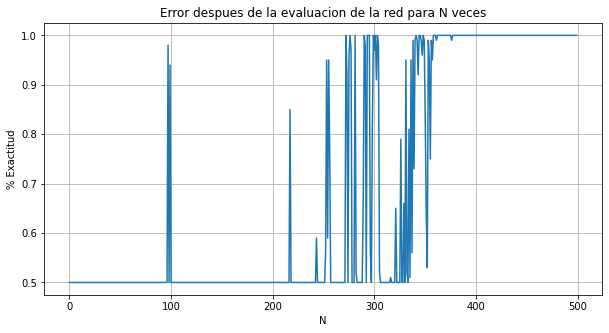

In [28]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(np.arange(N), resp)
plt.title("Error despues de la evaluacion de la red para N veces")
plt.xlabel("N")
plt.ylabel("% Exactitud")
plt.grid()